#  Installing the required libraries

In [ ]:
# Import the necessary libraries
import googleapiclient.discovery
import os
import json
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

# Locate and read the key from your .env file.
API_key = os.getenv('YouTube_API_key')


# Youtube API call

In [5]:
# Create an api call
youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=API_key)

# Make the search request
comment_response = youtube.commentThreads().list(
    part='snippet,replies',
    maxResults=200,
    videoId='40Kp_fa8vIw'
).execute()

# Get the comments
comments = comment_response['items']

# Print the comments
for comment in comments:
    print(comment['snippet']['topLevelComment']['snippet']['textDisplay'])

I just tried ChatGPT by asking it trial questions in electronics - the sort of things a keen amateur wouldn&#39;t know but a typical engineer would.  ChatGPT turned out to be hopeless.   Amusingly, every time I told it it was wrong and why.  Every time it came back with &quot;You are absolutely right!&quot;
It&#39;s says chatGPT is not available in your country, could anybody plz help me with that
This app is freaky amazing!!!!
We must remember, ChatGPT doesn&#39;t know how to code, it is also not a doctor or a vet, like any topic it can give you &quot;answers&quot; from what is trained upon, and lead you in right direction, but for coding questions the results aren&#39;t great. But AI is new, so wait a while longer who knows...
If google intergraded ChatGPT into there browser.
Thnx! Very helpful. You inspired me to have chatgbt help with my food preparation
I love ChatGPT! While I still do use Google for some things, if I have a question ChatGPT answers most of them instantly. Also it

# 3. Create a DataFrame

In [9]:
import pandas as pd

# Create a list of comments
comments = []

# Iterate over the comments and add them to the list
for comment in comment_response['items']:
    comments.append(comment['snippet']['topLevelComment']['snippet']['textDisplay'])

# Create a DataFrame
df1 = pd.DataFrame({'Comment': comments})

# Print the DataFrame
print(df1)

# View shape of output
df1.shape

                                              Comment
0   I just tried ChatGPT by asking it trial questi...
1   It&#39;s says chatGPT is not available in your...
2                      This app is freaky amazing!!!!
3   We must remember, ChatGPT doesn&#39;t know how...
4   If google intergraded ChatGPT into there browser.
..                                                ...
95                      we have the same mouse adrian
96  We are witnessing and living best times of lif...
97  I&#39;m afraid AI would not replace or destroy...
98               How would you use for repeat emails?
99  I agree. A huge shift for humans! Nice video. ...

[100 rows x 1 columns]


(100, 1)

In [10]:
# Determine values of output.
df1 = df['Comment'].values

# View results.
df1

array(['I just tried ChatGPT by asking it trial questions in electronics - the sort of things a keen amateur wouldn&#39;t know but a typical engineer would.  ChatGPT turned out to be hopeless.   Amusingly, every time I told it it was wrong and why.  Every time it came back with &quot;You are absolutely right!&quot;',
       'It&#39;s says chatGPT is not available in your country, could anybody plz help me with that',
       'This app is freaky amazing!!!!',
       'We must remember, ChatGPT doesn&#39;t know how to code, it is also not a doctor or a vet, like any topic it can give you &quot;answers&quot; from what is trained upon, and lead you in right direction, but for coding questions the results aren&#39;t great. But AI is new, so wait a while longer who knows...',
       'If google intergraded ChatGPT into there browser.',
       'Thnx! Very helpful. You inspired me to have chatgbt help with my food preparation',
       'I love ChatGPT! While I still do use Google for some things, 

# Pre-processing comments from youtube

In [12]:
# Import nltk and the required resources.
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words

nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [14]:
# The results will change every time the code is executed. Let's review the first 15.

# Print the first 15 comments without stop words
for i in range(25):
    print(i)
    print(df1[i])

0
I just tried ChatGPT by asking it trial questions in electronics - the sort of things a keen amateur wouldn&#39;t know but a typical engineer would.  ChatGPT turned out to be hopeless.   Amusingly, every time I told it it was wrong and why.  Every time it came back with &quot;You are absolutely right!&quot;
1
It&#39;s says chatGPT is not available in your country, could anybody plz help me with that
2
This app is freaky amazing!!!!
3
We must remember, ChatGPT doesn&#39;t know how to code, it is also not a doctor or a vet, like any topic it can give you &quot;answers&quot; from what is trained upon, and lead you in right direction, but for coding questions the results aren&#39;t great. But AI is new, so wait a while longer who knows...
4
If google intergraded ChatGPT into there browser.
5
Thnx! Very helpful. You inspired me to have chatgbt help with my food preparation
6
I love ChatGPT! While I still do use Google for some things, if I have a question ChatGPT answers most of them inst

In [15]:
# Look at one comment
# Based on the results of the previous cell, select a comment in English that contains keywords suitable for text analysis

# Set the index of the comment to be returned
tid = 6
df1[tid]

'I love ChatGPT! While I still do use Google for some things, if I have a question ChatGPT answers most of them instantly. Also it&#39;s good for a bit of fun too which is always good.'

In [16]:
# Split up each comment into individual words
df2 = [word_tokenize(_) for _ in df1]

# View results.
df2

[['I',
  'just',
  'tried',
  'ChatGPT',
  'by',
  'asking',
  'it',
  'trial',
  'questions',
  'in',
  'electronics',
  '-',
  'the',
  'sort',
  'of',
  'things',
  'a',
  'keen',
  'amateur',
  'wouldn',
  '&',
  '#',
  '39',
  ';',
  't',
  'know',
  'but',
  'a',
  'typical',
  'engineer',
  'would',
  '.',
  'ChatGPT',
  'turned',
  'out',
  'to',
  'be',
  'hopeless',
  '.',
  'Amusingly',
  ',',
  'every',
  'time',
  'I',
  'told',
  'it',
  'it',
  'was',
  'wrong',
  'and',
  'why',
  '.',
  'Every',
  'time',
  'it',
  'came',
  'back',
  'with',
  '&',
  'quot',
  ';',
  'You',
  'are',
  'absolutely',
  'right',
  '!',
  '&',
  'quot',
  ';'],
 ['It',
  '&',
  '#',
  '39',
  ';',
  's',
  'says',
  'chatGPT',
  'is',
  'not',
  'available',
  'in',
  'your',
  'country',
  ',',
  'could',
  'anybody',
  'plz',
  'help',
  'me',
  'with',
  'that'],
 ['This', 'app', 'is', 'freaky', 'amazing', '!', '!', '!', '!'],
 ['We',
  'must',
  'remember',
  ',',
  'ChatGPT',
  'does

In [17]:
# Get a list of all english words so we can exclude anything that doesn't appear on the list.
all_english_words = set(words.words())

# View results.
all_english_words

{'corpse',
 'fen',
 'shoaliness',
 'homolosine',
 'centesimi',
 'megalopsia',
 'quinolinium',
 'sistering',
 'Jocasta',
 'eccaleobion',
 'protoneurone',
 'lowland',
 'geometrine',
 'opisthophagic',
 'renvoi',
 'Turnhalle',
 'wooded',
 'unambush',
 'Andriana',
 'devicefulness',
 'pseudochromosome',
 'hemimetamorphic',
 'terrorization',
 'washbrew',
 'bisexuous',
 'overcharity',
 'fluorotype',
 'placable',
 'polybromide',
 'insapiency',
 'outriding',
 'goatweed',
 'offenseproof',
 'facture',
 'princock',
 'redivulgence',
 'scourge',
 'slaughteringly',
 'supraconscious',
 'biennial',
 'stramonium',
 'censoriousness',
 'alipterion',
 'readoption',
 'unbehaving',
 'mimmocking',
 'persuadably',
 'thinkably',
 'miscible',
 'appeasement',
 'Tubicola',
 'peptize',
 'Buyides',
 'susceptibly',
 'cobbly',
 'Planococcus',
 'sublingual',
 'classicolatry',
 'youngberry',
 'cunner',
 'superillustrate',
 'beflea',
 'dilatate',
 'phosphoriferous',
 'Achates',
 'mellay',
 'Louiqa',
 'intercomparable',
 '

In [19]:
 #Some pre-processing:
#-- lets get every word
#-- lets convert it to lowercase
#-- only include if the word is alphanumeric and if it is in the list of English words, but is not a stopword.

df3 = [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words] for x in df2]

In [20]:
# Let's have a look at the same comment as above.

df3[tid]

['love',
 'still',
 'use',
 'question',
 'instantly',
 'also',
 'good',
 'bit',
 'fun',
 'always',
 'good']

# Performing Sentimental analysis

In [23]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia = SentimentIntensityAnalyzer()

In [25]:
# Run through a dictionary comprehension to take every cleaned comment
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in df3}

In [26]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity = pd.DataFrame(df_polarity).T

# View the DataFrame.
polarity

,neg,neu,pos,compound
tried trial electronics sort keen amateur know typical engineer would turned hopeless amusingly every time told wrong every time came back quot absolutely right quot,0.194,0.669,0.137,-0.4215
available country could anybody help,0.000,0.597,0.403,0.4019
freaky amazing,0.397,0.000,0.603,0.3182
must remember know code also doctor vet like topic give quot quot trained upon lead right direction great ai new wait longer,0.000,0.752,0.248,0.7650
browser,0.000,1.000,0.000,0.0000
...,...,...,...,...
mouse,0.000,1.000,0.000,0.0000
living best times life history might consider ai cause disaster,0.252,0.491,0.258,0.0258
afraid ai would replace destroy future big also might consider someday given intelligence think otherwise take cause destruction humanity,0.274,0.608,0.118,-0.6249
would use repeat,0.000,1.000,0.000,0.0000


In [30]:
# With the non-aplhanumeric words (the emojis, handles, hashtags and stopwords) removed 
# some of the most positive words are single words

# Get the top 10 most positive cleaned 
polarity.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
love,0.000,0.000,1.000,0.6369
like,0.000,0.000,1.000,0.3612
cool,0.000,0.000,1.000,0.3182
impressive,0.000,0.000,1.000,0.5106
like advanced,0.000,0.000,1.000,0.5423
top free powerful ai,0.000,0.112,0.888,0.7845
many thanks dear really interesting useful,0.000,0.146,0.854,0.8927
helpful inspired help food preparation,0.000,0.187,0.813,0.8271
wow world,0.000,0.208,0.792,0.5859
great time old enjoy,0.000,0.215,0.785,0.8074


In [28]:
# Get the top 10 most negative words related to ChatGPT.
polarity.sort_values('neg', ascending=0).head(10)

,neg,neu,pos,compound
dumb,1.000,0.000,0.000,-0.5106
chat destroy us,0.636,0.364,0.000,-0.5423
dumb ai must bias people,0.610,0.390,0.000,-0.5719
political bias,0.583,0.417,0.000,-0.1027
chat must racist prejudice ai trust crap ever,0.576,0.233,0.192,-0.7650
yes whatever knife kill human knife move kill human ridiculous delusion,0.551,0.324,0.125,-0.8807
information becomes dangerous weapon control dictate punish human weapon heading world humanism fade agenda testify,0.498,0.502,0.000,-0.8720
yea could possibly go wrong,0.437,0.563,0.000,-0.4767
freaky amazing,0.397,0.000,0.603,0.3182
one used ai made two tired,0.367,0.633,0.000,-0.4404


In [29]:
# The describe function on the compound will show the distribution and moments. 

polarity['compound'].describe()

count    100.000000
mean       0.226928
std        0.459841
min       -0.890500
25%        0.000000
50%        0.295700
75%        0.571900
max        0.975300
Name: compound, dtype: float64

# Visualising the results

<AxesSubplot:>

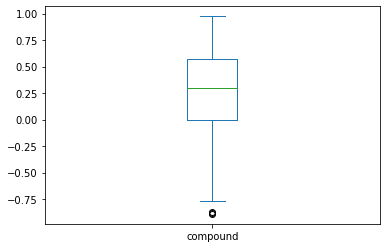

In [31]:
# Sometimes the best way to see is to plot. 
# In the data sampled here many of the values are 0
# There are less negative values than positive but the negative values are highly negative.

%matplotlib inline
import matplotlib.pyplot as plt

# The boxplot is a nice way to see how many values sit on the edges as outliers.
_plot = polarity.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

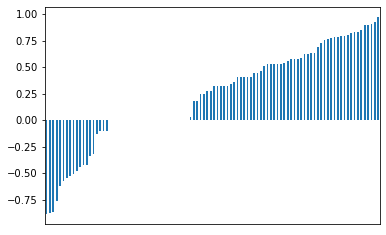

In [34]:
# Example of a barplot.
_plot = polarity.reset_index()['compound'].sort_values()
ax1 = plt.axes()
_plot.plot(kind='bar')

x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.show()
plt.close()

array([[<AxesSubplot:title={'center':'compound'}>]], dtype=object)

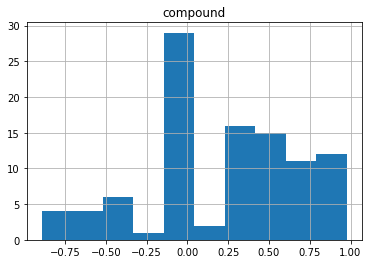

In [35]:
# You can also create a histogram:
polarity['compound'].sort_values().reset_index().hist()

Since there are a large number of neutral comments, I have decided to add another review analysis  from Youtube.

# Creating the second review process


# Youtube API call

In [37]:
 #Create an api call
#youtube = googleapiclient.discovery.build('youtube', 'v3', developerKey=API_key)

# Make the search request
comment_response = youtube.commentThreads().list(
    part='snippet,replies',
    maxResults=100,
    videoId='U67mK4JkuNM'
).execute()

# Get the comments
comments = comment_response['items']

# Print the comments
for comment in comments:
    print(comment['snippet']['topLevelComment']['snippet']['textDisplay'])

👉🏻ChatGPT Mastery Course: <a href="https://hi.switchy.io/chatgpt-mastery-course">https://hi.switchy.io/chatgpt-mastery-course</a>
I managed to get chatgpt 3.5 to do the movie plot summary challenge, although it required a slightly different prompt, it was able to do it effectively, summarising the plots whilst adhering to the alphabetical order and never reusing first letters. <br><br>Here’s one for the dark brotherhood of The Elder Scrolls IV: Oblivion (I did make some adjustments mind, but it was pretty good, and yes I know it’s not a chronological plot summary, but I thought it was still rather impressive) <br><br>A Brotherhood’s clandestine darkness engulfs fearsome guild, holding institutionally justified kill lists. Mysterious night operatives perform quests, regarding Sithis. Twisted underworld vigilantes will, xenophobic yet zealous.
Did chat gbt 4 give you this information 😂
i was just thinking about how cool it would be if you could give chatgpt images im late wow
Where can y

# Creating a Dataframe

In [41]:
# Create a list of comments
comments2 = []
# Iterate over the comments and add them to the list
for comment in comment_response['items']:
    comments2.append(comment['snippet']['topLevelComment']['snippet']['textDisplay'])

# Create a DataFrame
df20 = pd.DataFrame({'Comment': comments2})

# Print the DataFrame
print(df20)

# View shape of output
df20.shape

                                              Comment
0   👉🏻ChatGPT Mastery Course: <a href="https://hi....
1   I managed to get chatgpt 3.5 to do the movie p...
2          Did chat gbt 4 give you this information 😂
3   i was just thinking about how cool it would be...
4   Where can you use chat gpt 4 it&#39;s not avai...
..                                                ...
92  The really interesting part is to try and play...
93  is that green /white dash a &quot;Skynet&quot;...
94  If xXXxxxXxxxXXXxXxxXx becomes xxXXXXXXXXXXXXX...
95  Another great video! Your explanation was real...
96  Exceptional content... you came out with this ...

[97 rows x 1 columns]


(97, 1)

In [42]:
# Determine values of output.
df21 = df20['Comment'].values

# View results.
df21

array(['👉🏻ChatGPT Mastery Course: <a href="https://hi.switchy.io/chatgpt-mastery-course">https://hi.switchy.io/chatgpt-mastery-course</a>',
       'I managed to get chatgpt 3.5 to do the movie plot summary challenge, although it required a slightly different prompt, it was able to do it effectively, summarising the plots whilst adhering to the alphabetical order and never reusing first letters. <br><br>Here’s one for the dark brotherhood of The Elder Scrolls IV: Oblivion (I did make some adjustments mind, but it was pretty good, and yes I know it’s not a chronological plot summary, but I thought it was still rather impressive) <br><br>A Brotherhood’s clandestine darkness engulfs fearsome guild, holding institutionally justified kill lists. Mysterious night operatives perform quests, regarding Sithis. Twisted underworld vigilantes will, xenophobic yet zealous.',
       'Did chat gbt 4 give you this information 😂',
       'i was just thinking about how cool it would be if you could give 

# Pre processing the comments

In [43]:
stop_words2 = set(stopwords.words('english'))

In [44]:
# Reviewing the first 20 results
# Print the first 15 comments without stop words
for i in range(20):
    print(i)
    print(df21[i])

0
👉🏻ChatGPT Mastery Course: <a href="https://hi.switchy.io/chatgpt-mastery-course">https://hi.switchy.io/chatgpt-mastery-course</a>
1
I managed to get chatgpt 3.5 to do the movie plot summary challenge, although it required a slightly different prompt, it was able to do it effectively, summarising the plots whilst adhering to the alphabetical order and never reusing first letters. <br><br>Here’s one for the dark brotherhood of The Elder Scrolls IV: Oblivion (I did make some adjustments mind, but it was pretty good, and yes I know it’s not a chronological plot summary, but I thought it was still rather impressive) <br><br>A Brotherhood’s clandestine darkness engulfs fearsome guild, holding institutionally justified kill lists. Mysterious night operatives perform quests, regarding Sithis. Twisted underworld vigilantes will, xenophobic yet zealous.
2
Did chat gbt 4 give you this information 😂
3
i was just thinking about how cool it would be if you could give chatgpt images im late wow
4
W

In [45]:
# Set the index of the comment to be returned
tid = 1
df21[tid]

'I managed to get chatgpt 3.5 to do the movie plot summary challenge, although it required a slightly different prompt, it was able to do it effectively, summarising the plots whilst adhering to the alphabetical order and never reusing first letters. <br><br>Here’s one for the dark brotherhood of The Elder Scrolls IV: Oblivion (I did make some adjustments mind, but it was pretty good, and yes I know it’s not a chronological plot summary, but I thought it was still rather impressive) <br><br>A Brotherhood’s clandestine darkness engulfs fearsome guild, holding institutionally justified kill lists. Mysterious night operatives perform quests, regarding Sithis. Twisted underworld vigilantes will, xenophobic yet zealous.'

In [46]:
# Split up each comment into individual words
df22 = [word_tokenize(_) for _ in df21]

# View results.
df22

[['👉🏻ChatGPT',
  'Mastery',
  'Course',
  ':',
  '<',
  'a',
  'href=',
  "''",
  'https',
  ':',
  '//hi.switchy.io/chatgpt-mastery-course',
  "''",
  '>',
  'https',
  ':',
  '//hi.switchy.io/chatgpt-mastery-course',
  '<',
  '/a',
  '>'],
 ['I',
  'managed',
  'to',
  'get',
  'chatgpt',
  '3.5',
  'to',
  'do',
  'the',
  'movie',
  'plot',
  'summary',
  'challenge',
  ',',
  'although',
  'it',
  'required',
  'a',
  'slightly',
  'different',
  'prompt',
  ',',
  'it',
  'was',
  'able',
  'to',
  'do',
  'it',
  'effectively',
  ',',
  'summarising',
  'the',
  'plots',
  'whilst',
  'adhering',
  'to',
  'the',
  'alphabetical',
  'order',
  'and',
  'never',
  'reusing',
  'first',
  'letters',
  '.',
  '<',
  'br',
  '>',
  '<',
  'br',
  '>',
  'Here',
  '’',
  's',
  'one',
  'for',
  'the',
  'dark',
  'brotherhood',
  'of',
  'The',
  'Elder',
  'Scrolls',
  'IV',
  ':',
  'Oblivion',
  '(',
  'I',
  'did',
  'make',
  'some',
  'adjustments',
  'mind',
  ',',
  'but',
 

In [47]:
# Get a list of all english words so we can exclude anything that doesn't appear on the list.
all_english_words2 = set(words.words())

# View results.
all_english_words2

{'corpse',
 'fen',
 'shoaliness',
 'homolosine',
 'centesimi',
 'megalopsia',
 'quinolinium',
 'sistering',
 'Jocasta',
 'eccaleobion',
 'protoneurone',
 'lowland',
 'geometrine',
 'opisthophagic',
 'renvoi',
 'Turnhalle',
 'wooded',
 'unambush',
 'Andriana',
 'devicefulness',
 'pseudochromosome',
 'hemimetamorphic',
 'terrorization',
 'washbrew',
 'bisexuous',
 'overcharity',
 'fluorotype',
 'placable',
 'polybromide',
 'insapiency',
 'outriding',
 'goatweed',
 'offenseproof',
 'facture',
 'princock',
 'redivulgence',
 'scourge',
 'slaughteringly',
 'supraconscious',
 'biennial',
 'stramonium',
 'censoriousness',
 'alipterion',
 'readoption',
 'unbehaving',
 'mimmocking',
 'persuadably',
 'thinkably',
 'miscible',
 'appeasement',
 'Tubicola',
 'peptize',
 'Buyides',
 'susceptibly',
 'cobbly',
 'Planococcus',
 'sublingual',
 'classicolatry',
 'youngberry',
 'cunner',
 'superillustrate',
 'beflea',
 'dilatate',
 'phosphoriferous',
 'Achates',
 'mellay',
 'Louiqa',
 'intercomparable',
 '

In [48]:
#-- only include if the word is alphanumeric and if it is in the list of English words, but is not a stopword.

df23 = [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and y.lower() in all_english_words2] for x in df22]

In [57]:
df23[tid]

['get',
 'movie',
 'plot',
 'summary',
 'challenge',
 'although',
 'slightly',
 'different',
 'prompt',
 'able',
 'effectively',
 'whilst',
 'alphabetical',
 'order',
 'never',
 'first',
 'one',
 'dark',
 'brotherhood',
 'elder',
 'oblivion',
 'make',
 'mind',
 'pretty',
 'good',
 'yes',
 'know',
 'chronological',
 'plot',
 'summary',
 'thought',
 'still',
 'rather',
 'impressive',
 'brotherhood',
 'clandestine',
 'darkness',
 'fearsome',
 'guild',
 'holding',
 'institutionally',
 'kill',
 'mysterious',
 'night',
 'perform',
 'regarding',
 'twisted',
 'underworld',
 'yet',
 'zealous']

# Sentiment analysis

In [50]:
# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia2 = SentimentIntensityAnalyzer()

In [51]:
# Run through a dictionary comprehension to take every cleaned comment
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df2_polarity = {" ".join(_) : sia2.polarity_scores(" ".join(_)) for _ in df23}

In [52]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity2 = pd.DataFrame(df2_polarity).T

# View the DataFrame.
polarity2

,neg,neu,pos,compound
mastery course,0.000,1.000,0.000,0.0000
get movie plot summary challenge although slightly different prompt able effectively whilst alphabetical order never first one dark brotherhood elder oblivion make mind pretty good yes know chronological plot summary thought still rather impressive brotherhood clandestine darkness fearsome guild holding institutionally kill mysterious night perform regarding twisted underworld yet zealous,0.140,0.595,0.265,0.7506
chat give information,0.000,1.000,0.000,0.0000
thinking cool would could give late wow,0.000,0.450,0.550,0.7269
use chat available open ai,0.000,1.000,0.000,0.0000
...,...,...,...,...
really interesting part try play chess,0.000,0.426,0.574,0.6590
green dash quot quot secret code,0.000,1.000,0.000,0.0000
becomes becomes become question answer correctly also learn solution multiple times worrying comprehend say might prevent us true,0.106,0.619,0.274,0.4215
another great video explanation really well done learned lot keep good work,0.000,0.489,0.511,0.8553


In [54]:
# With the non-aplhanumeric words (the emojis, handles, hashtags and stopwords) removed 
# some of the most positive words are single words

# Get the top 10 most positive cleaned 
polarity2.sort_values('pos', ascending=0).head(10)

,neg,neu,pos,compound
fantastic,0.0,0.000,1.000,0.5574
thank,0.0,0.000,1.000,0.3612
please,0.0,0.000,1.000,0.3182
sentence impressive great comparison,0.0,0.103,0.897,0.8271
good clear review thanks,0.0,0.106,0.894,0.8126
nice video thanks,0.0,0.149,0.851,0.6908
wow hope comes free version,0.0,0.167,0.833,0.8750
excellent u really came awesome review good job excellent review thanks,0.0,0.221,0.779,0.9557
try free,0.0,0.233,0.767,0.5106
good video,0.0,0.256,0.744,0.4404


In [55]:
# Get the top 10 most negative words related to ChatGPT.
polarity2.sort_values('neg', ascending=0).head(10)

,neg,neu,pos,compound
dumb,1.000,0.000,0.000,-0.5106
chat destroy us,0.636,0.364,0.000,-0.5423
dumb ai must bias people,0.610,0.390,0.000,-0.5719
political bias,0.583,0.417,0.000,-0.1027
chat must racist prejudice ai trust crap ever,0.576,0.233,0.192,-0.7650
yes whatever knife kill human knife move kill human ridiculous delusion,0.551,0.324,0.125,-0.8807
information becomes dangerous weapon control dictate punish human weapon heading world humanism fade agenda testify,0.498,0.502,0.000,-0.8720
yea could possibly go wrong,0.437,0.563,0.000,-0.4767
freaky amazing,0.397,0.000,0.603,0.3182
one used ai made two tired,0.367,0.633,0.000,-0.4404


In [58]:
# The describe function on the compound will show the distribution and moments. 

polarity2['compound'].describe()

count    94.000000
mean      0.235571
std       0.365227
min      -0.802000
25%       0.000000
50%       0.025800
75%       0.506425
max       0.955700
Name: compound, dtype: float64

# Plotting Graphs

array([[<AxesSubplot:title={'center':'compound'}>]], dtype=object)

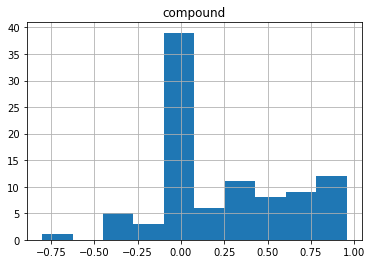

In [59]:
# You can also create a histogram:
polarity2['compound'].sort_values().reset_index().hist()

<AxesSubplot:>

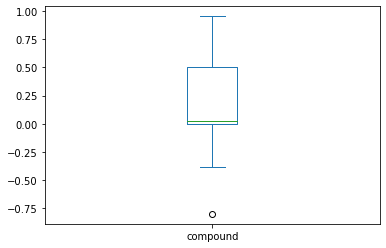

In [60]:
# Box plot
# The boxplot is a nice way to see how many values sit on the edges as outliers.
_plot = polarity2.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

### Summary of the analysis

I have included two reviews to find out the results to create a more balanced view.
In the first review, the count of 100 indicates the total analysed instances. The mean of 0.2269 shows a positive value. The minimum value is -0.8905 and the maximun value is 0.9753,the Standard deviation is 0.459 shows a fair amount of variability in the dataset. The 75th  quartile value of 0.571 shows more positve sentiment. The 25th quartile value is 0, showing presence of neutral sentiments. This is the reason , I have included another CHATGPT review from Youtube to identify a second pattern.
From the Plots,  we can identify more sense of positve sentiment and fair amount of neutral sentiment as well but less negative sentiments.

In the second review, the count of 94 indiocates the total analysed instances. The mean of 0.23 shows a positive leniency. The minimum value is -0.802 and the maximum is 0.955. The standard deviation is 0.36 showing a fair amount of variability in the dataset. The 75th quartile, has a value of 0.50, which shows more of a positive sentiment. The 25th quartile has value of 0,indicating the presence of neutrality. Once again from the plots, we can identify more sense of positve feedback regarding CHATGPT, less negative sentiments and not forgetting fair amount of neutrality.




### Conclusion & Recommendations

As FutureProof wants to  identify leveraging the use of CHATGPT for generating content, aiming in enhancing brand's social media presence including social media platforms like Youtube, there are more positve sentiments than negative but a fair amount of neutrality as well. This would suggest to think of moving in the direction to incorporate CHAPGPT positvely, it would warrant further research, identifying more Youtube reviews sampling to substantiate the trend.